In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### <b>Household File:</b> One record per household. ###

In [2]:
# accessing the data set
house_data = pd.read_csv('csv/hhpub.csv')
# reading out first 20 rows
house_data.head(20)

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,2,3,1,3,5,7,2,1,2,...,2,187.314320,T,50,1500,750,750,20,750,300
1,30000008,5,2,1,2,4,8,1,1,2,...,2,69.513032,R,5,300,300,150,5,300,300
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,5,3,1,2,2,3,1,5,5,...,2,279.143588,S,40,300,300,150,50,750,300
4,30000029,3,3,1,2,2,5,2,5,1,...,2,103.240304,S,40,1500,750,750,40,1500,750
5,30000039,5,3,1,2,2,10,1,3,5,...,1,2329.525332,S,40,7000,1500,1500,5,3000,1500
6,30000041,4,3,1,2,2,11,1,1,1,...,2,788.614240,T,40,300,50,25,40,300,300
7,30000062,5,4,1,2,6,10,1,1,1,...,2,294.501777,R,20,50,50,25,5,50,50
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
9,30000085,1,2,1,1,2,9,1,1,4,...,2,190.669041,U,50,17000,17000,5000,50,30000,17000


### <b>Person File:</b> One record for each household member. ###

In [3]:
# accessing the data set
person_data = pd.read_csv('csv/perpub.csv')
# reading out first 20 rows
person_data.head(20)

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,1,67,3,2,1,2,2,6,2,...,2,206.690153,T,50,1500,750,750,20,750,300
1,30000007,2,66,3,2,2,1,2,1,-1,...,2,197.075742,T,50,1500,750,750,20,750,300
2,30000007,3,28,2,2,3,2,2,5,2,...,2,219.514210,T,50,1500,750,750,20,750,300
3,30000008,1,55,5,2,1,1,1,1,-1,...,2,63.185911,R,5,300,300,150,5,300,300
4,30000008,2,49,4,2,2,2,1,1,-1,...,2,58.665911,R,5,300,300,150,5,300,300
5,30000012,1,45,5,2,1,2,1,1,-1,...,2,58.966275,C,80,17000,17000,5000,60,17000,7000
6,30000019,1,68,1,2,1,1,1,97,2,...,2,233.138565,S,40,300,300,150,50,750,300
7,30000019,2,66,2,2,2,2,1,4,2,...,2,249.148185,S,40,300,300,150,50,750,300
8,30000029,1,72,3,2,1,1,1,6,2,...,2,91.407643,S,40,1500,750,750,40,1500,750
9,30000029,2,72,2,2,2,2,1,6,2,...,2,96.249289,S,40,1500,750,750,40,1500,750


### <b>Travel Day Trip File:</b> One record for each trip reported by each household member person age 5+. ###

In [4]:
# accessing the data set
trip_data = pd.read_csv('csv/trippub.csv')
# reading out first 20 rows
trip_data.head(20)

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300
5,30000007,3,2,1430,1445,15,2.243,3,0,0,...,60,750,300,50,1500,750,750,20,750,300
6,30000008,1,1,1115,1130,15,8.017,6,0,0,...,5,300,300,30,300,300,150,40,1500,750
7,30000008,1,2,2330,2340,10,8.017,6,0,0,...,40,1500,750,5,300,300,150,5,300,300
8,30000012,1,1,550,605,15,3.395,4,0,0,...,60,17000,7000,30,750,300,350,5,750,300
9,30000012,1,2,700,715,15,3.395,4,0,0,...,5,750,300,80,17000,17000,5000,60,17000,7000


### <b>Vehicle File:</b> One record for each household vehicle. ###

In [5]:
# accessing the data set
car_data = pd.read_csv("csv/vehpub.csv")
# reading out first 20 rows
car_data.head(20)

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,...,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,1,2007,10,49,49032,1,1,3,69000,...,750,20,750,300,487.064221,1126.457778,30,-9,2.312750,1
1,30000007,2,2004,13,49,49442,1,2,-8,164000,...,750,20,750,300,250.899523,580.267873,19,-9,2.312750,1
2,30000007,3,1998,19,19,19014,1,1,1,120000,...,750,20,750,300,444.462475,1027.930589,18,-9,2.312750,1
3,30000007,4,1997,20,19,19021,1,1,2,-88,...,750,20,750,300,40.329575,93.272224,18,-9,2.312750,1
4,30000007,5,1993,24,20,20481,1,4,2,300000,...,750,20,750,300,888.404197,2054.656806,14,-9,2.312750,1
5,30000008,1,2014,3,20,20028,1,1,97,-88,...,150,5,300,300,210.331757,476.716926,29,-9,2.266500,1
6,30000008,2,2010,7,20,20024,1,3,2,-88,...,150,5,300,300,677.137458,1534.732049,19,-9,2.266500,1
7,30000008,3,2008,9,20,20039,1,1,97,-88,...,150,5,300,300,226.612423,513.617057,27,-9,2.266500,1
8,30000008,4,2004,13,20,20481,1,4,1,128000,...,150,5,300,300,651.859696,1477.440002,15,-9,2.266500,1
9,30000012,1,2011,6,58,58037,1,1,1,70115,...,5000,60,17000,7000,219.853193,542.011404,21,-9,2.465333,1


# Trip Length Analysis #
'STRTTIME', 'ENDTIME', and 'TRVLCMIN' are important variables here

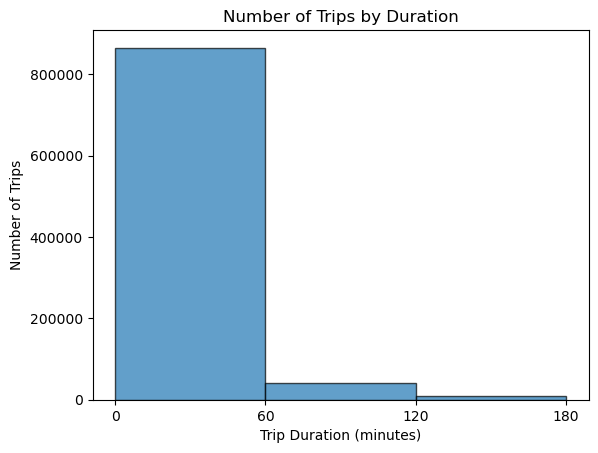

In [6]:
# define custom bin edges
bin_edges = [0, 60, 120, 180]

# create the histogram
plt.hist(trip_data['TRVLCMIN'], bins=bin_edges, edgecolor='k', alpha=0.7)

# set xticks to align with bin edges
plt.xticks(bin_edges)

# add labels and title
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Duration')

# show the plot
plt.show()

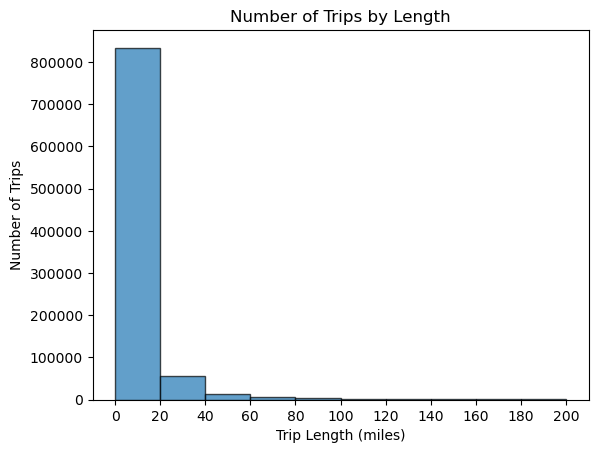

In [7]:
# define custom bin edges
bin_edges = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# create the histogram
plt.hist(trip_data['TRPMILES'], bins=bin_edges, edgecolor='k', alpha=0.7)

# set xticks to align with bin edges
plt.xticks(bin_edges)

# add labels and title
plt.xlabel('Trip Length (miles)')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Length')

# show the plot
plt.show()

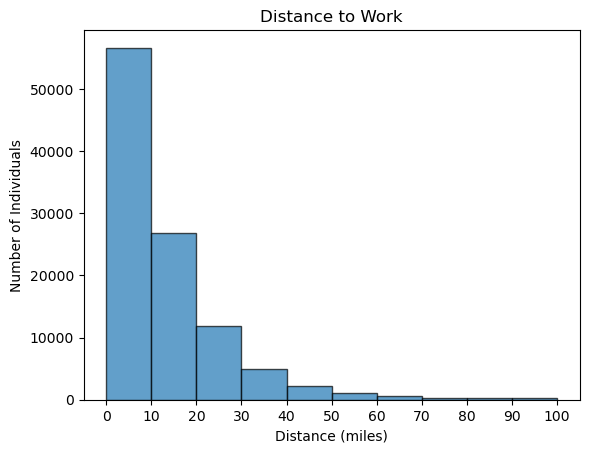

In [8]:
# define custom bin edges
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# create the histogram
plt.hist(person_data['DISTTOWK17'], bins=bin_edges, edgecolor='k', alpha=0.7)

# set xticks to align with bin edges
plt.xticks(bin_edges)

# add labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Individuals')
plt.title('Distance to Work')

# show the plot
plt.show()

## Vehicle Types ##
-1, -8, -9: n/a, 1: biodiesel, 2: plug-in hybrid, 3: electric, 4: non-plug-in hybrid

In [9]:
# slicing out electric vehicle data by household identifier
ev_house_ids = list(car_data[car_data['HFUEL']==3]['HOUSEID'].unique())
# ev houses as a fraction of non-ev houses
ev_frac = len(ev_house_ids)/len(list(car_data['HOUSEID'].unique()))
# find the percentage of ev houses
print(f'The fraction of households with electric vehicles is: {round(ev_frac*100, ndigits=3)}%')

The fraction of households with electric vehicles is: 0.469%


In [10]:
# finding electric vehicle households that correspond to those identified in vehicle csv
ev_houses = house_data[house_data['HOUSEID'].isin(ev_house_ids)]

## Income Comparison ##
1: less than $10000, 2: $10000 to $14999, 3: $15000 to $24999,...,9: $125000 to $149999, 10: $150000 to $199999, 11: $200000 or more

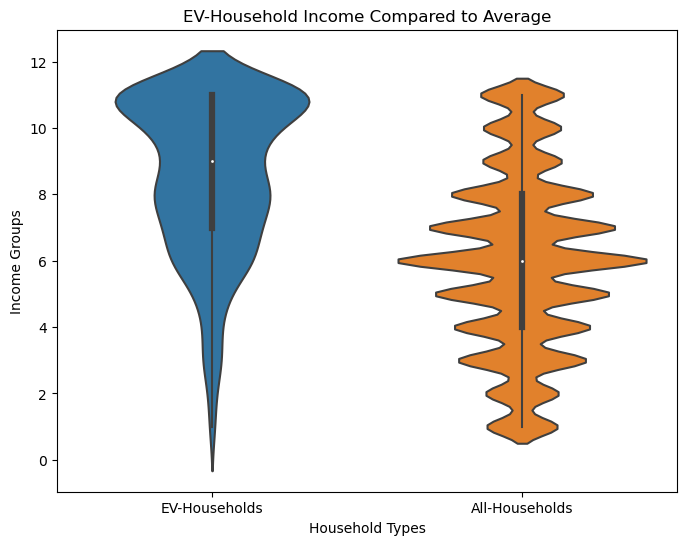

In [11]:
# slice out the right data for the two to be compared and drop n/a values
ev_incomes = ev_houses[ev_houses['HHFAMINC'] > 0]['HHFAMINC']
house_incomes = house_data[house_data['HHFAMINC'] > 0]['HHFAMINC']

# create violin plot figure
plt.figure(figsize=(8, 6))
sns.violinplot(data=[ev_incomes, house_incomes])

# add in labels and title
plt.xticks([0, 1], ['EV-Households', 'All-Households'])
plt.xlabel('Household Types')
plt.ylabel('Income Groups')
plt.title('EV-Household Income Compared to Average')

# show plot
plt.show()

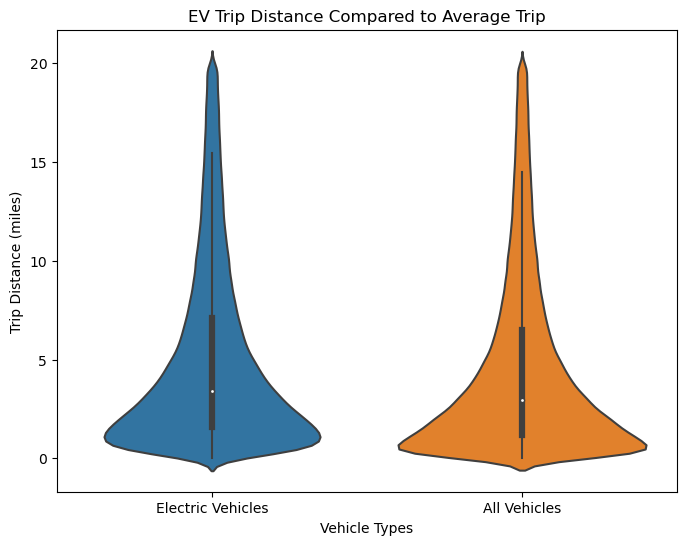

In [12]:
# slicing out electric vehicle data by vehicle identifier
ev_car_id = list(car_data[car_data['HFUEL']==3]['VEHID'].unique())
ev_car_trips = trip_data[trip_data['VEHID'].isin(ev_car_id)]
ev_trip_dists = ev_car_trips[ev_car_trips['TRPMILES']>0]['TRPMILES']
all_trip_dists = trip_data[trip_data['TRPMILES']>0]['TRPMILES']

# create violin plot figure
plt.figure(figsize=(8, 6))
sns.violinplot(data=[ev_trip_dists[ev_trip_dists<20], all_trip_dists[all_trip_dists<20]])

# add in labels and title
plt.xticks([0, 1], ['Electric Vehicles', 'All Vehicles'])
plt.xlabel('Vehicle Types')
plt.ylabel('Trip Distance (miles)')
plt.title('EV Trip Distance Compared to Average Trip')

# show plot
plt.show()

In [13]:
# mean travel distances
print(f'The mean trip with an electric vehicle is: {round(ev_trip_dists.mean(), ndigits=3)} miles')
print(f'The mean trip across all vehicles is: {round(all_trip_dists.mean(), ndigits=3)} miles')

The mean trip with an electric vehicle is: 9.776 miles
The mean trip across all vehicles is: 11.457 miles


In [14]:
# median travel distances
print(f'The median trip with an electric vehicle is: {round(ev_trip_dists.median(), ndigits=3)} miles')
print(f'The median trip across all vehicles is: {round(all_trip_dists.median(), ndigits=3)} miles')

The median trip with an electric vehicle is: 3.983 miles
The median trip across all vehicles is: 3.45 miles


##survey package r##
##svyr pacage r (wrapper)##

## Weighting the Data ##

Household: WTHHFIN, Person: WTPERFIN, Trip: WTTRDFIN, Vehicle: WTHHFIN

In [15]:
houseWeights = house_data['WTHHFIN']
personWeights = person_data['WTPERFIN']
tripWeights = trip_data['WTTRDFIN']
carWeights = car_data['WTHHFIN']

### Splitting Data into 1 hour+ Trips ###
trip purposes for trip groups, trip purposes where stay duration is near an hour (60 to 90) for turnover of spots, distribution of trip purposes at least an hour
WHYTO (100 mile long trips destination)
tour vs loop trip

In [16]:
# long trips (1 hour or more trips)
longTrips = trip_data[trip_data['TRVLCMIN'] >= 60]
# get weights for long trips
longTripWeights = longTrips['WTTRDFIN']
# turnover trips (between 60 and 90 minutes)
turnoverTrips = longTrips[(longTrips['DWELTIME'] >= 45) & (longTrips['DWELTIME'] <= 120)]
# get weights for turnover trips
turnoverWeights = turnoverTrips['WTTRDFIN']

In [17]:
# get an idea for where trips 
turnoverTrips['WHYTO'].value_counts()

WHYTO
 1     1963
 13    1507
 11    1138
 15     832
 17     822
 18     805
 3      694
 7      571
 4      452
 16     351
 19     291
 14     249
 6      238
 12     160
 5       70
 8       60
 97      58
 2       45
 9       13
 10       7
-7        4
-8        2
Name: count, dtype: int64

1: home activities, 13: buy meals(go out for a meal/carry-out), 11: buy goods (groceries/gas/clothes), 15: recreational activities (parks/movies/bars/museums), 17: visit friends/relatives, 18: health care visit (medical/dental/therapy), 3: work, 7: change type of transportation, 4: work-related meeting/trip, 16: exercise, 19: religious activity, 14: errands (post office, library)

### Determing which Locations have a Significant Impact on Dwell Time ###

In [31]:
# getting a copy of trip data and creating a new column for turnover
trip_data_copy = trip_data.copy()
trip = trip_data_copy.sample(n=100000) # taking a sample of the data to reduce time complexity
trip['turnover'] = (trip['DWELTIME'].between(45, 120)).astype(int)

# defining x and y for regression
X = trip[['TRVLCMIN', 'TRPMILES']]  # predictor variables
y = trip['DWELTIME']  # dwell time is continuous

# generating a split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict dwelling time on the test set
y_pred = model.predict(X_test)

# Calculate the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')

Coefficients: [ 0.14645372 -0.03457797]
Intercept: 87.34420753771018
Mean Squared Error (MSE): 21870.53357741061
R-squared (R2) Score: 0.0001756047438271624


In [1]:
def helper(a, b):
    itrA = (a + b, b)
    itrB = (a, b + a)
    return itrA, itrB

def isPossible(a, b, c, d):
    points = {(a, b)}  # Initialize set with the starting point (a, b)

    while True:
        new_points = set()  # Create a temporary set for new points generated in this iteration
        for point in points:
            itrA, itrB = helper(*point)  # Using helper function to generate new points
            if itrA[0] <= c and itrA[1] <= d:
                new_points.add(itrA)
            if itrB[0] <= c and itrB[1] <= d:
                new_points.add(itrB)

        if not new_points:  # If no new points are generated, break the loop
            break

        points.update(new_points)  # Add the new points to the set
        if all(p[0] > c or p[1] > d for p in new_points):  # Check if all new points are greater than (c, d)
            break

    if (c, d) in points:
        return 'Yes'
    else:
        return 'No'

# Test example
result = isPossible(1, 2, 5, 7)
print(result)